In [55]:
#Workshop
#Sturdy-Octo-Disco-Adding-Sunglasses-for-a-Cool-New-Look
**Name:** PRASHANTH K   **Reg No** 212223230152

In [44]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Face')

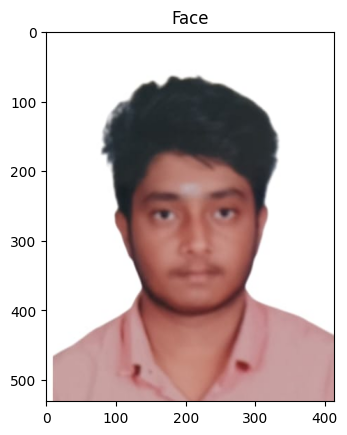

In [45]:
# Load the Face Image
faceImage = cv2.imread(r"C:\Users\admin\Downloads\img.jpg")
plt.imshow(faceImage[:,:,::-1]);plt.title("Face")


In [46]:
faceImage.shape

(531, 413, 3)

In [47]:
#resized_faceImage.shape
faceImage.shape

(531, 413, 3)

Text(0.5, 1.0, 'glassPNG')

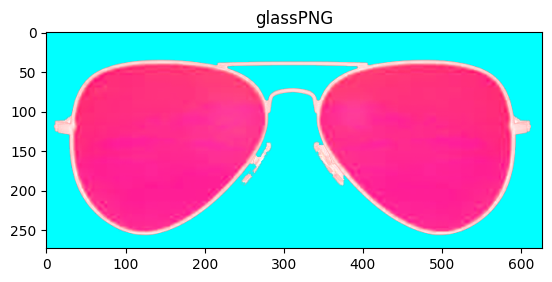

In [48]:
# Load the Sunglass image with Alpha channel
# (http://pluspng.com/sunglass-png-1104.html)
glassPNG = cv2.imread(r"C:\Users\admin\Downloads\sunglass-png-aviator-sunglass-png-pic-627.png",-1)
plt.imshow(glassPNG[:,:,::-1]);plt.title("glassPNG")

In [49]:
# Resize the image to fit over the eye region
glassPNG = cv2.resize(glassPNG,(210,90))
print("image Dimension ={}".format(glassPNG.shape))

image Dimension =(90, 210, 4)


In [50]:
# Separate the Color and alpha channels
glassBGR = glassPNG[:,:,0:3]
glassMask1 = glassPNG[:,:,3]

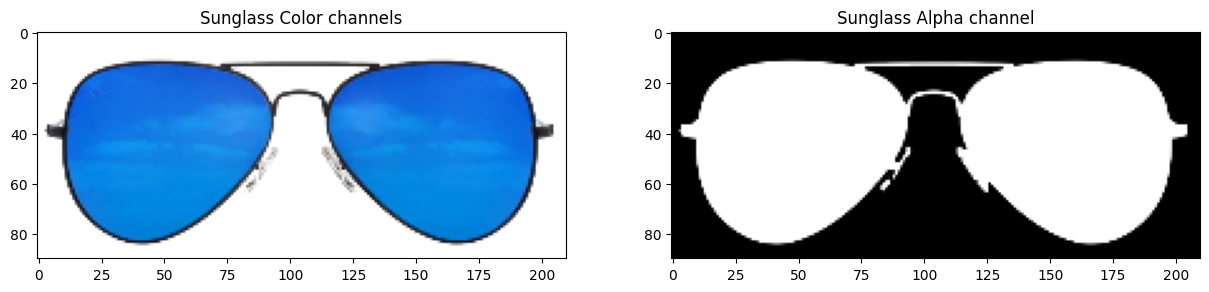

In [51]:
# Display the images for clarity
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(glassBGR[:,:,::-1]);plt.title('Sunglass Color channels');
plt.subplot(122);plt.imshow(glassMask1,cmap='gray');plt.title('Sunglass Alpha channel');

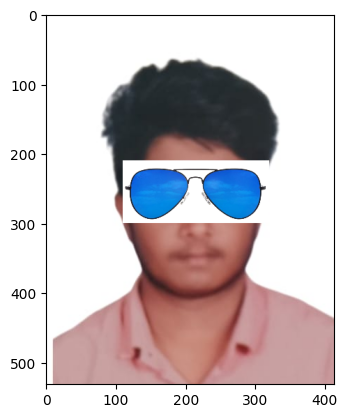

In [52]:
# Make a copy
#faceWithGlassesNaive = resized_faceImage.copy()
faceWithGlassesNaive = faceImage.copy()

# Replace the eye region with the sunglass image
faceWithGlassesNaive[210:300,110:320]=glassBGR

plt.imshow(faceWithGlassesNaive[...,::-1])

Text(0.5, 1.0, 'Augmented Eye and Sunglass')

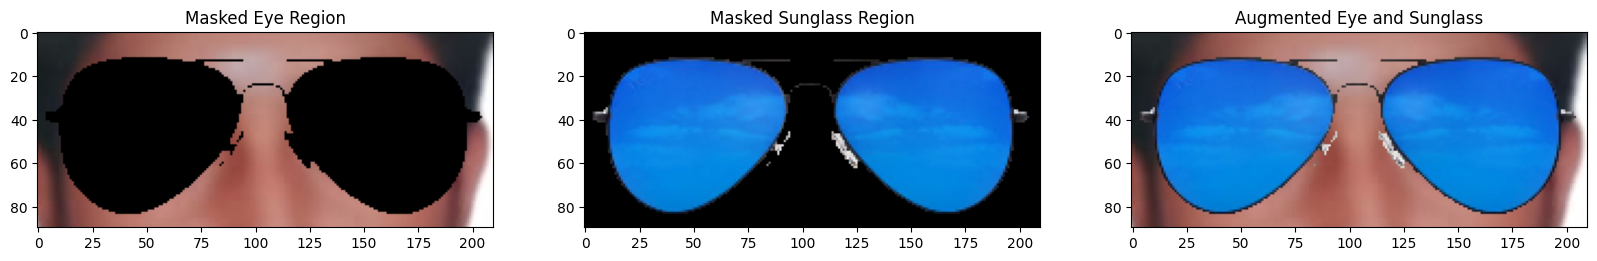

In [53]:
# Make the dimensions of the mask same as the input image.
# Since Face Image is a 3-channel image, we create a 3 channel image for the mask
glassMask = cv2.merge((glassMask1,glassMask1,glassMask1))

# Make the values [0,1] since we are using arithmetic operations
glassMask = np.uint8(glassMask/255)

# Make a copy
faceWithGlassesArithmetic = faceImage.copy()

# Get the eye region from the face image
eyeROI= faceWithGlassesArithmetic[210:300,110:320]

# Use the mask to create the masked eye region
maskedEye = cv2.multiply(eyeROI,(1-  glassMask ))

# Use the mask to create the masked sunglass region
maskedGlass = cv2.multiply(glassBGR,glassMask)

# Combine the Sunglass in the Eye Region to get the augmented image
eyeRoiFinal = cv2.add(maskedEye, maskedGlass)

# Display the intermediate results
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(maskedEye[...,::-1]);plt.title("Masked Eye Region")
plt.subplot(132);plt.imshow(maskedGlass[...,::-1]);plt.title("Masked Sunglass Region")
plt.subplot(133);plt.imshow(eyeRoiFinal[...,::-1]);plt.title("Augmented Eye and Sunglass")

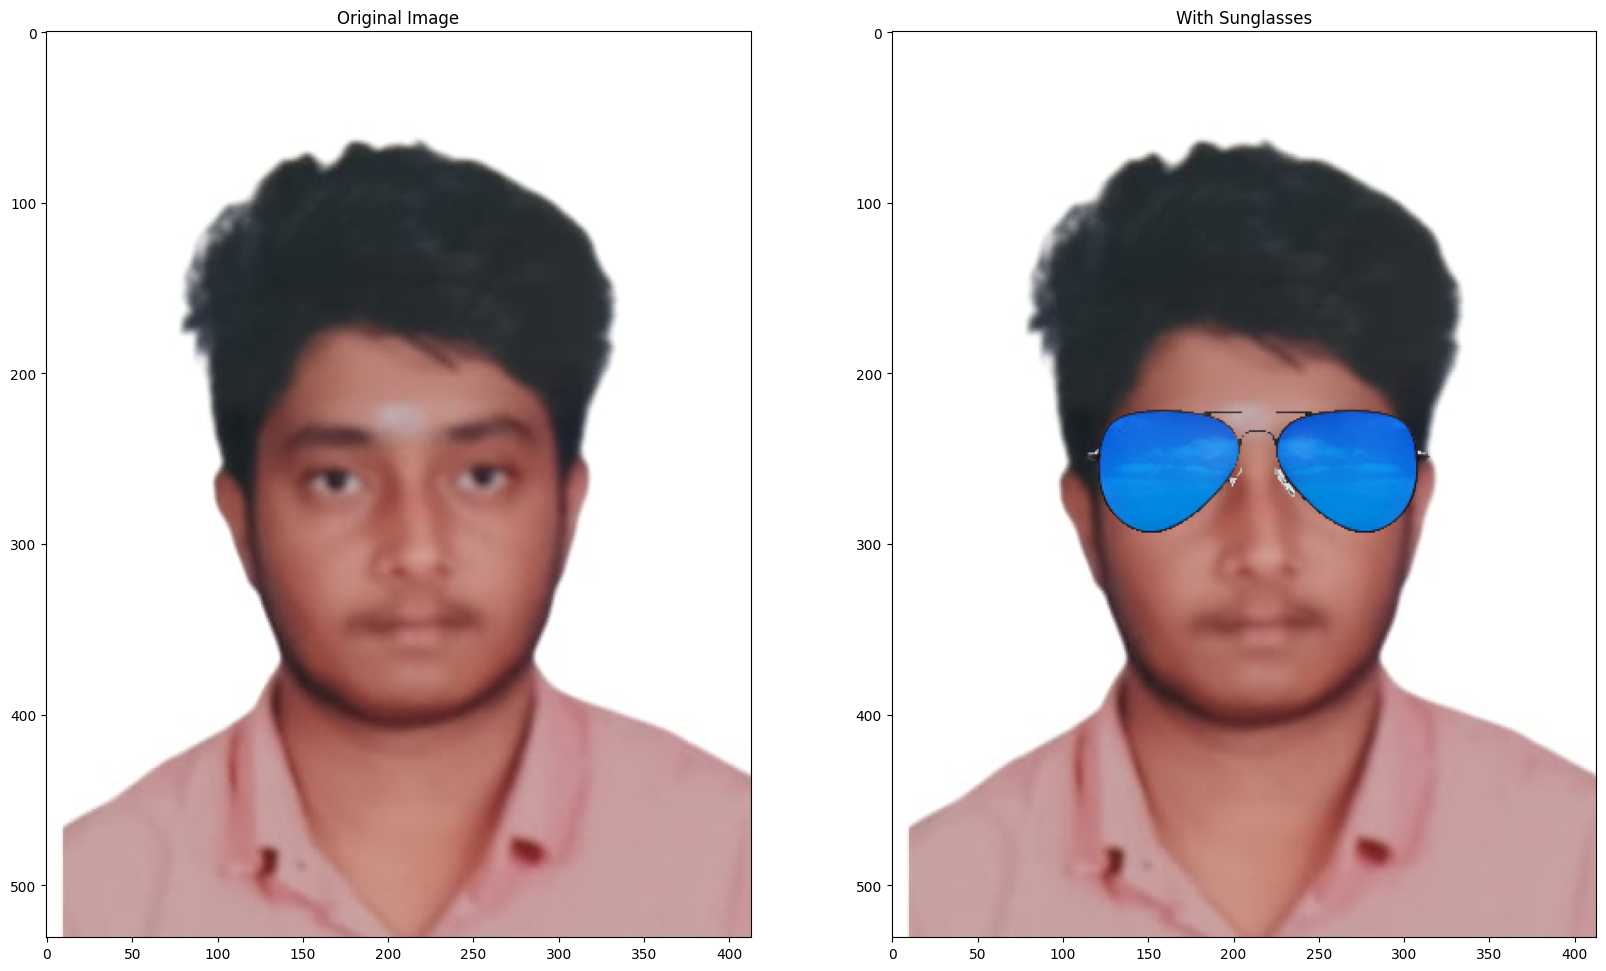

In [54]:
# Replace the eye ROI with the output from the previous section
faceWithGlassesArithmetic[210:300,110:320]=eyeRoiFinal

# Display the final result
plt.figure(figsize=[20,20]);
plt.subplot(121);plt.imshow(faceImage[:,:,::-1]); plt.title("Original Image");
plt.subplot(122);plt.imshow(faceWithGlassesArithmetic[:,:,::-1]);plt.title("With Sunglasses");